In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif torch.backends.mps.is_available() and ALLOW_MPS:
    DEVICE = "mps"
    
print(f"Using {DEVICE} device")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

Using cuda device


## Text to Image

In [2]:
prompt = "a photograph of an astronaut riding a horse, 8k resolution"
uncond_prompt = ""
do_cfg = True
cfg_scale = 7

input_image = None
image_path = "../data/horse.png"

strength = 0.9

sampler = 'ddpm'
num_inference_steps = 50
seed = 42

In [3]:
output_image = pipeline.generate(
    prompt = prompt,
    uncond_prompt = uncond_prompt,
    input_image = input_image,
    strength = strength,
    do_cfg = do_cfg,
    cfg_scale = cfg_scale,
    sampler_name = sampler,
    n_inference_steps = num_inference_steps,
    seed = seed,
    models = models,
    device = DEVICE,
    tokenizer = tokenizer,
)

100%|██████████| 50/50 [15:31<00:00, 18.64s/it]


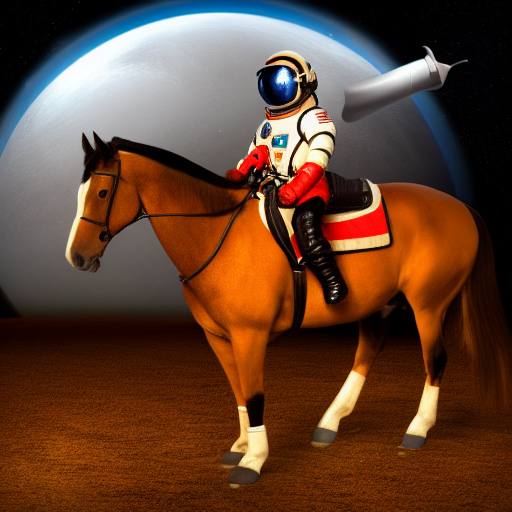

In [4]:
Image.fromarray(output_image)

## Image to Image

In [ ]:
input_image = None
image_path = "../data/horse.png"

strength = 0.9

sampler = 'ddpm'
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt = prompt,
    uncond_prompt = uncond_prompt,
    input_image = input_image,
    strength = strength,
    do_cfg = do_cfg,
    cfg_scale = cfg_scale,
    sampler_name = sampler,
    n_inference_steps = num_inference_steps,
    models = models,
    seed = seed,
    device = DEVICE,
    tokenizer = tokenizer,
    
)